# Random Walk Analysis

In [8]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [10]:
# Atlantic Division
ResultsFrame2018= pd.read_excel('./TestingResults/Season2018.xlsx')
ResultsFrame2019= pd.read_excel('./TestingResults/Season2019.xlsx')
ResultsFrame2020= pd.read_excel('./TestingResults/Season2020.xlsx')
ResultsFrame2021= pd.read_excel('./TestingResults/Season2021.xlsx')
ResultsFrame2022= pd.read_excel('./TestingResults/Season2022.xlsx')
ResultsFrame2023= pd.read_excel('./TestingResults/Season2023.xlsx')

# Frames with outlier handiling
ResultsFrame2018OL= pd.read_excel('./TestingResults/Season2018Test2.xlsx')
ResultsFrame2019OL= pd.read_excel('./TestingResults/Season2019Test2.xlsx')
ResultsFrame2020OL= pd.read_excel('./TestingResults/Season2020Test2.xlsx')
ResultsFrame2021OL= pd.read_excel('./TestingResults/Season2021Test2.xlsx')
ResultsFrame2022OL= pd.read_excel('./TestingResults/Season2022Test2.xlsx')
ResultsFrame2023OL= pd.read_excel('./TestingResults/Season2023Test2.xlsx')


In [12]:
ResultsFrame = pd.concat([ 
                             ResultsFrame2018
                            ,ResultsFrame2019
                            ,ResultsFrame2020
                            ,ResultsFrame2021
                            ,ResultsFrame2022
                            ,ResultsFrame2023
                       
                         ], ignore_index=True)
del ResultsFrame['Unnamed: 0']

ResultsFrameOL = pd.concat([ 
                             ResultsFrame2018OL
                            ,ResultsFrame2019OL
                            ,ResultsFrame2020OL
                            ,ResultsFrame2021OL
                            ,ResultsFrame2022OL
                            ,ResultsFrame2023OL
                       
                         ], ignore_index=True)
del ResultsFrameOL['Unnamed: 0']

In [14]:
#ResultsFrame.head()

In [16]:
ResultsFrame['Abs Error'].mean()

9.978658091672349

In [18]:
ResultsFrameOL['Abs Error'].mean()

9.97197281897981

### Distribution Plots - Team Points & Absolute Error

In [2]:
#plt.hist(ResultsFrame['Team_Points'], bins=40, color='skyblue', edgecolor='black')

In [4]:
#plt.hist(ResultsFrame['Error'], bins=40, color='skyblue', edgecolor='black')

In [6]:
#plt.hist(ResultsFrameOL['Error'], bins=40, color='skyblue', edgecolor='black')

### Outlier Handling

In [20]:
# Identify outliers
threshold = 1
thresholdHigh = 1
thresholdLow = -1
# Calculate the Z-scores
ResultsFrame['z_score'] = (ResultsFrame['Team_Points'] - ResultsFrame['Team_Points'].mean()) / ResultsFrame['Team_Points'].std()

ResultsFrame['outlier'] = ResultsFrame['z_score'].abs() > threshold
ResultsFrame['outlier_High'] = ResultsFrame['z_score'] > thresholdHigh
ResultsFrame['outlier_Low'] = ResultsFrame['z_score'] < thresholdLow

# Calculate the Z-scores
ResultsFrameOL['z_score'] = (ResultsFrameOL['Team_Points'] - ResultsFrameOL['Team_Points'].mean()) / ResultsFrameOL['Team_Points'].std()

ResultsFrameOL['outlier'] = ResultsFrameOL['z_score'].abs() > threshold
ResultsFrameOL['outlier_High'] = ResultsFrameOL['z_score'] > thresholdHigh
ResultsFrameOL['outlier_Low'] = ResultsFrameOL['z_score'] < thresholdLow

In [40]:
record_count = ResultsFrame.shape[0]
record_count

13986

In [44]:
record_countNoOutliers = ResultsFrame_NoOutliers.shape[0]
record_countNoOutliers

9765

In [24]:
ResultsFrame_NoOutliers = ResultsFrame[ResultsFrame['outlier']==False]
ResultsFrameOL_NoOutliers = ResultsFrameOL[ResultsFrameOL['outlier']==False]

In [30]:
ResultsFrame_NoOutliers['Abs Error'].mean()

6.875938667901807

In [32]:
ResultsFrameOL_NoOutliers['Abs Error'].mean()

6.863565617325429

In [25]:
#ResultsFrame_NoOutliers

(array([  2.,   1.,   3.,   5.,   8.,  17.,  29.,  43.,  64.,  96., 131.,
        211., 279., 298., 408., 451., 555., 595., 612., 619., 659., 617.,
        643., 577., 556., 473., 421., 356., 298., 233., 185.,  99.,  78.,
         64.,  41.,  17.,   9.,   9.,   2.,   1.]),
 array([-30.77087188, -29.28297301, -27.79507413, -26.30717526,
        -24.81927638, -23.33137751, -21.84347863, -20.35557976,
        -18.86768089, -17.37978201, -15.89188314, -14.40398426,
        -12.91608539, -11.42818651,  -9.94028764,  -8.45238877,
         -6.96448989,  -5.47659102,  -3.98869214,  -2.50079327,
         -1.01289439,   0.47500448,   1.96290335,   3.45080223,
          4.9387011 ,   6.42659998,   7.91449885,   9.40239773,
         10.8902966 ,  12.37819547,  13.86609435,  15.35399322,
         16.8418921 ,  18.32979097,  19.81768985,  21.30558872,
         22.7934876 ,  24.28138647,  25.76928534,  27.25718422,
         28.74508309]),
 <BarContainer object of 40 artists>)

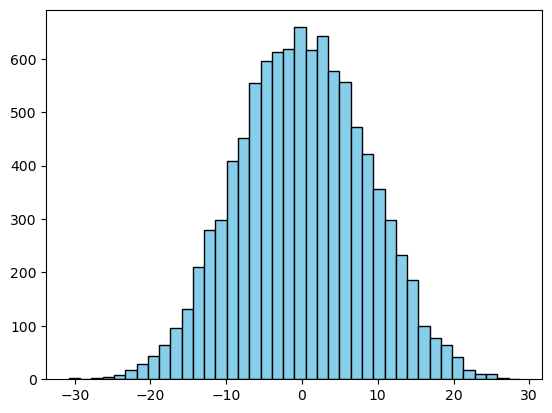

In [36]:
plt.hist(ResultsFrame_NoOutliers['Error'], bins=40, color='skyblue', edgecolor='black')

In [27]:
ResultsFrame_NoOutliers['Abs Error'].mean()

6.875938667901807

In [29]:
ResultsFrameOL_NoOutliers['Abs Error'].mean()

6.863565617325429

### Indivual Team Investigation

In [113]:
TeamList = [
            'MIL','TOR','BOS','IND'
           ,'MIA','PHI','BRK','ORL'
           ,'CHO','WAS','CHI','NYK'
           ,'DET','ATL','CLE','LAL'
           ,'LAC','DEN','HOU','OKC'
           ,'UTA','DAL','POR','MEM'
           ,'PHO','SAS','SAC','NOP'
           ,'MIN','GSW'
           ]
seasonList = ['2018-2019','2019-2020','2020-2021','2021-2022','2022-2023','2023-2024']


In [115]:
seasons = []
Teams = []
absError=[]
averageOutlierPointsAboveThreshold = []
averageOutlierPointsBelowThreshold = []
errorNoOutliers = []

In [117]:
for season in seasonList:
    TeamFrame = ResultsFrame[ResultsFrame['Season']== season]
    for team in TeamList:
        TeamFrame = TeamFrame[TeamFrame['Team' ]== team]
        # Calculate the Z-scores
        TeamFrame['z_score'] = (TeamFrame['Team_Points'] - TeamFrame['Team_Points'].mean()) / TeamFrame['Team_Points'].std()
        # Identify outliers
        threshold = 1
        thresholdHigh = 1
        thresholdLow = -1
        
        TeamFrame['outlier'] = TeamFrame['z_score'].abs() > threshold
        TeamFrame['outlier_High'] = TeamFrame['z_score'] > thresholdHigh
        TeamFrame['outlier_Low'] = TeamFrame['z_score'] < thresholdLow
        
        absError.append(TeamFrame['Abs Error'].mean())
        
        outlierFrameAboveThreshold = TeamFrame[TeamFrame['outlier_High']==True]
        averageOutlierPointsAboveThreshold.append(outlierFrameAboveThreshold['Team_Points'].mean())
        
        OutlierFrameBelowThreshold = TeamFrame[TeamFrame['outlier_Low']==True]
        averageOutlierPointsBelowThreshold.append(OutlierFrameBelowThreshold['Team_Points'].mean())
    
        nonOutlierFrame = TeamFrame[TeamFrame['outlier']==False]
        errorNoOutliers.append(nonOutlierFrame['Abs Error'].mean())
        Teams.append(team)
        seasons.append(season)

In [119]:
OutputFrame = pd.DataFrame({
                            'Season':seasons,
                            'Team': Teams,
                            'Absolute Error': absError,
                            'Team Points - Average Outlier Value (Above Threshold)':averageOutlierPointsAboveThreshold,
                            'Team Points - Average Outlier Value (Below Threshold)':averageOutlierPointsBelowThreshold,
    
                            'Absolute Error (Outliers Removed)':errorNoOutliers,
                            



})

In [121]:
OutputFrame.head(5)

,Season,Team,Absolute Error,Team Points - Average Outlier Value (Above Threshold),Team Points - Average Outlier Value (Below Threshold),Absolute Error (Outliers Removed)
0,2018-2019,MIL,10.813986,137.0,98.454545,6.385966
1,2018-2019,TOR,NaN,NaN,NaN,NaN
2,2018-2019,BOS,NaN,NaN,NaN,NaN
3,2018-2019,IND,NaN,NaN,NaN,NaN
4,2018-2019,MIA,NaN,NaN,NaN,NaN


## Yearly Outlier Statistics

### 2018 - 2019

In [125]:
# Mean Error
print(OutputFrame[OutputFrame['Season']== '2018-2019']['Absolute Error'].mean())
# Error Without Outliers
print(OutputFrame[OutputFrame['Season']== '2018-2019']['Absolute Error (Outliers Removed)'].mean())

10.813986353350874
6.385966114809702


### 2019 - 2020

In [127]:
# Mean Error
print(OutputFrame[OutputFrame['Season']== '2019-2020']['Absolute Error'].mean())
# Error Without Outliers
print(OutputFrame[OutputFrame['Season']== '2019-2020']['Absolute Error (Outliers Removed)'].mean())

9.924322885095725
6.760871305757894


### 2020 - 2021

In [129]:
# Mean Error
print(OutputFrame[OutputFrame['Season']== '2020-2021']['Absolute Error'].mean())
# Error Without Outliers
print(OutputFrame[OutputFrame['Season']== '2020-2021']['Absolute Error (Outliers Removed)'].mean())

10.341215647266338
6.397485783548001


### 2021 - 2022

In [132]:
# Mean Error
print(OutputFrame[OutputFrame['Season']== '2021-2022']['Absolute Error'].mean())
# Error Without Outliers
print(OutputFrame[OutputFrame['Season']== '2021-2022']['Absolute Error (Outliers Removed)'].mean())

10.932018800382368
7.985596661716272


### 2022 - 2023

In [135]:
# Mean Error
print(OutputFrame[OutputFrame['Season']== '2022-2023']['Absolute Error'].mean())
# Error Without Outliers
print(OutputFrame[OutputFrame['Season']== '2022-2023']['Absolute Error (Outliers Removed)'].mean())

11.011372849439306
8.287591672023094


### 2023 - 2024

In [138]:
# Mean Error
print(OutputFrame[OutputFrame['Season']== '2023-2024']['Absolute Error'].mean())
# Error Without Outliers
print(OutputFrame[OutputFrame['Season']== '2023-2024']['Absolute Error (Outliers Removed)'].mean())

9.767468394694406
6.42993566979938


In [140]:
OutputFrame[(OutputFrame['Season']== '2018-2019') & (OutputFrame['Team']== 'MIL')]

,Season,Team,Absolute Error,Team Points - Average Outlier Value (Above Threshold),Team Points - Average Outlier Value (Below Threshold),Absolute Error (Outliers Removed)
0,2018-2019,MIL,10.813986,137.0,98.454545,6.385966


In [ ]:
for team in teamList:
    TeamFrame = ResultsFrame[ResultsFrame['Team']== team]
    